<a href="https://colab.research.google.com/github/Q-annnnn/USTH_Machine_learning_2/blob/main/LW1_QUAN_TRUNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#load data set to Pandas dataframe
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",
                 names = ["variance", "skewness", "curtosis","entropy", "class"])

In [ ]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
#define 'features'
features = ["variance", "skewness", "curtosis","entropy"]
#separating out the feature values
x = df.loc[:, features].values
#separating out the class values
y = df.loc[:,["class"]].values


In [ ]:
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from statistics import mean
from statistics import variance

In [ ]:
#find mean
mean_arr = [0]*4
for i in range (0,4):
  mean_arr[i] = mean(x[:,i])
mean_arr

[0.43373525706997085,
 1.9223531206393587,
 1.3976271172667638,
 -1.1916565200437317]

In [ ]:
#find variance
var_arr = [0]*4
for i in range (0,4):
  var_arr[i] = variance(x[:,i])
var_arr

[8.081299121945175, 34.44570967968295, 18.576359377624268, 4.414256203357671]

In [ ]:
#separating out the features as a Pandas dataframe
banknote_data = df.loc[:,features]
banknote_data

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [ ]:
#find covariance
banknote_data.cov()

,variance,skewness,curtosis,entropy
variance,8.081299,4.405083,-4.666323,1.653338
skewness,4.405083,34.445710,-19.905119,-6.490033
curtosis,-4.666323,-19.905119,18.576359,2.887241
entropy,1.653338,-6.490033,2.887241,4.414256


In [ ]:
#find correlation
coma = banknote_data.corr()
coma

,variance,skewness,curtosis,entropy
variance,1.000000,0.264026,-0.380850,0.276817
skewness,0.264026,1.000000,-0.786895,-0.526321
curtosis,-0.380850,-0.786895,1.000000,0.318841
entropy,0.276817,-0.526321,0.318841,1.000000


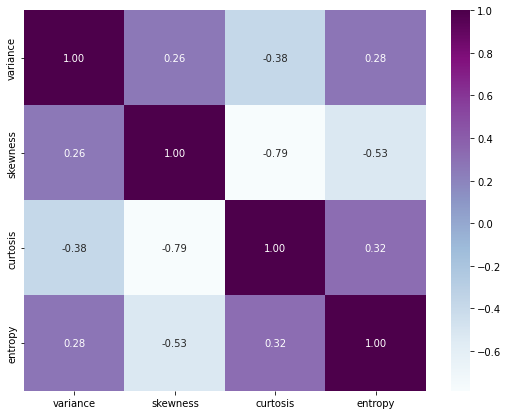

In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
sea.heatmap(coma, cbar=True, fmt=".2f", annot= True, cmap= "BuPu")

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardlizing features
datascaled = StandardScaler().fit_transform(banknote_data)
datascaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [ ]:
from sklearn.decomposition import PCA
#PCA 2D projection
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(datascaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
principalComponents

array([[-1.47280494, -1.16391668],
       [-1.63944068, -1.09381204],
       [ 0.51391884, -1.32487953],
       ...,
       [ 4.04932734,  2.03602288],
       [ 3.01961738,  1.39214023],
       [ 1.17058249,  0.09103094]])

In [ ]:
principalDf

,principal component 1,principal component 2
0,-1.472805,-1.163917
1,-1.639441,-1.093812
2,0.513919,-1.324880
3,-2.310952,-0.202514
4,1.193416,0.024654
...,...,...
1367,-0.221995,-0.290458
1368,1.909395,0.142149
1369,4.049327,2.036023
1370,3.019617,1.392140


In [ ]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf

,principal component 1,principal component 2,class
0,-1.472805,-1.163917,0
1,-1.639441,-1.093812,0
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,0
4,1.193416,0.024654,0
...,...,...,...
1367,-0.221995,-0.290458,1
1368,1.909395,0.142149,1
1369,4.049327,2.036023,1
1370,3.019617,1.392140,1


In [ ]:
pca.explained_variance_

array([2.18149408, 1.29409812])

In [ ]:
pca.explained_variance_ratio_

array([0.54497602, 0.32328872])

In [ ]:
pca.explained_variance_ratio_.sum()

0.868264743372138

In [ ]:
import matplotlib.pyplot as plt

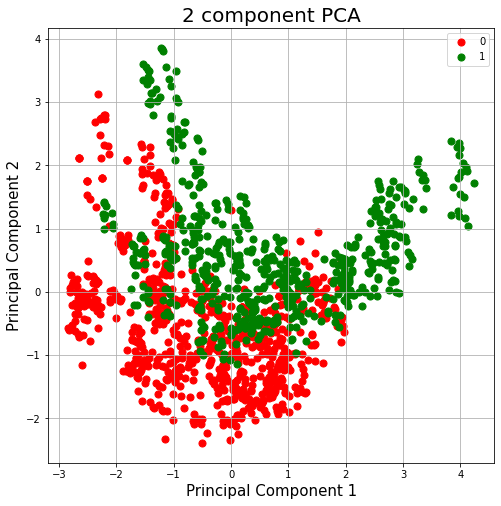

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

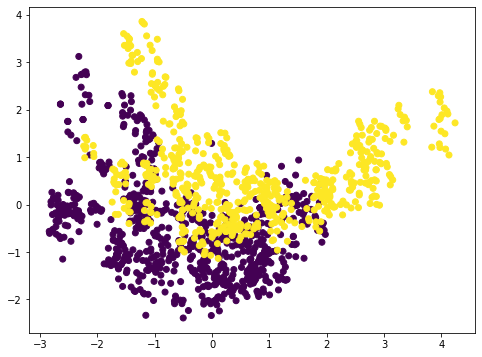

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=y)
plt.xlable= ("component 1")
plt.ylable= ("component 2")

In [ ]:
#PCA 3D projection
pca3D = PCA(n_components = 3)
principalComponents3 = pca3D.fit_transform(datascaled)
principal3Df = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
principalComponents3

array([[-1.47280494, -1.16391668, -0.16725349],
       [-1.63944068, -1.09381204,  0.37118695],
       [ 0.51391884, -1.32487953,  0.50911186],
       ...,
       [ 4.04932734,  2.03602288,  1.78592393],
       [ 3.01961738,  1.39214023,  0.68147895],
       [ 1.17058249,  0.09103094, -1.11306082]])

In [ ]:
principal3Df

,principal component 1,principal component 2,principal component 3
0,-1.472805,-1.163917,-0.167253
1,-1.639441,-1.093812,0.371187
2,0.513919,-1.324880,0.509112
3,-2.310952,-0.202514,0.540781
4,1.193416,0.024654,0.421189
...,...,...,...
1367,-0.221995,-0.290458,-0.512657
1368,1.909395,0.142149,-0.091369
1369,4.049327,2.036023,1.785924
1370,3.019617,1.392140,0.681479


In [ ]:
final3Df = pd.concat([principal3Df, df[['class']]], axis = 1)
final3Df

,principal component 1,principal component 2,principal component 3,class
0,-1.472805,-1.163917,-0.167253,0
1,-1.639441,-1.093812,0.371187,0
2,0.513919,-1.324880,0.509112,0
3,-2.310952,-0.202514,0.540781,0
4,1.193416,0.024654,0.421189,0
...,...,...,...,...
1367,-0.221995,-0.290458,-0.512657,1
1368,1.909395,0.142149,-0.091369,1
1369,4.049327,2.036023,1.785924,1
1370,3.019617,1.392140,0.681479,1


In [ ]:
pca3D.explained_variance_

array([2.18149408, 1.29409812, 0.35163873])

In [ ]:
pca3D.explained_variance_ratio_

array([0.54497602, 0.32328872, 0.08784561])

In [ ]:
pca3D.explained_variance_ratio_.sum()

0.9561103518752202

In [ ]:
import plotly.express as pe
pe.scatter_3d(final3Df,x="principal component 1",y="principal component 2",z="principal component 3", color = "class")